### Step 1 : Import the required libraries

In [78]:
# Importing required libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn import metrics   
from sklearn.model_selection import train_test_split   
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB

### Step 2 : Load the dataset

In [79]:
# Load the data
data=pd.read_csv("E:\\Msc Data Science VIT\\sem2\\Machine Learning\\SVM\\IRIS.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Step 3 : Separating the independent dependent variables

In [80]:
# Separating the independent dependent variables of the dataset  
x = data.drop(columns = "species")  
y = data["species"]  
names_features = x.columns  
target_labels = y.unique() 

In [81]:
names_features

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [82]:
target_labels

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Step 4 : Splitting the dataset into training and testing

In [83]:
# Splitting the dataset into training and testing datasets  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 93)  

# Decision Tree

In [84]:
# Creating an instance of the classifier class  
dtc = DecisionTreeClassifier(max_depth = 3, random_state = 93)  
  
# Fitting the training dataset to the model  
dtc.fit(x_train, y_train)  

DecisionTreeClassifier(max_depth=3, random_state=93)

In [85]:
# Predicting on test data
y_pred = dtc.predict(x_test)  

In [86]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')  # 'macro' for multi-class classification
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' for multi-class classification
print("Recall:", recall)

Accuracy: 0.9333333333333333
Precision: 0.9361111111111112
Recall: 0.9361111111111112


In [87]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)  
matrix = pd.DataFrame(confusion_matrix) 
matrix

,0,1,2
0,14,0,0
1,0,14,2
2,0,1,14


In [88]:
y_probs = dtc.predict_proba(x_test)  # Predict class probabilities
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr')  # 'ovr' for multi-class classification
print("ROC AUC:", roc_auc)

ROC AUC: 0.963521711366539


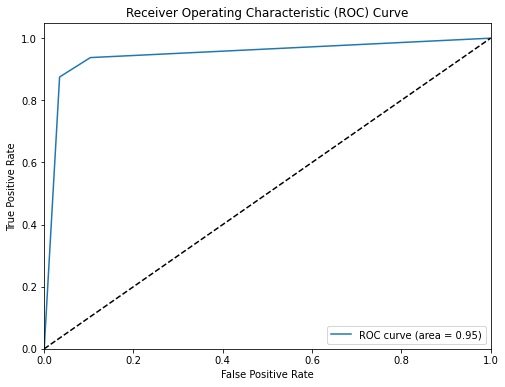

In [89]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs[:, 1], pos_label=target_labels[1])
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Support Vector Machine

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

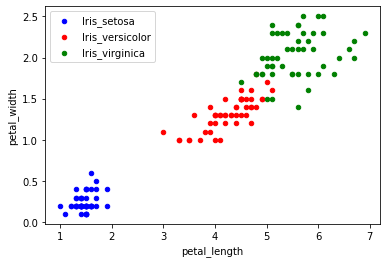

In [90]:
# Selecing any two features for plotting
Iris_setosa=data[data["species"]=="Iris-setosa"]
Iris_versicolor=data[data["species"]=="Iris-versicolor"]
Iris_virginica=data[data["species"]=="Iris-virginica"]
axes=Iris_setosa.plot(kind="scatter",x="petal_length",y="petal_width", color="Blue",label="Iris_setosa")
Iris_versicolor.plot(kind="scatter",x="petal_length",y="petal_width",color="Red", label="Iris_versicolor",ax=axes)
Iris_virginica.plot(kind="scatter",x="petal_length",y="petal_width",color="Green", label="Iris_virginica",ax=axes)

In [91]:
# Splitting the dataset into training and testing datasets  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 93)  

In [92]:
svm_classifier=svm.SVC(kernel="linear",C=2)
svm_classifier.fit(x_train,y_train)

SVC(C=2, kernel='linear')

In [93]:
y_pred = svm_classifier.predict(x_test) 

In [94]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')  # 'macro' for multi-class classification
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' for multi-class classification
print("Recall:", recall)

Accuracy: 0.9555555555555556
Precision: 0.9607843137254902
Recall: 0.9583333333333334


In [95]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)  
matrix = pd.DataFrame(confusion_matrix) 
matrix

,0,1,2
0,14,0,0
1,0,14,2
2,0,0,15


In [96]:
y_probs = dtc.predict_proba(x_test)  # Predict class probabilities
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr')  # 'ovr' for multi-class classification
print("ROC AUC:", roc_auc)

ROC AUC: 0.963521711366539


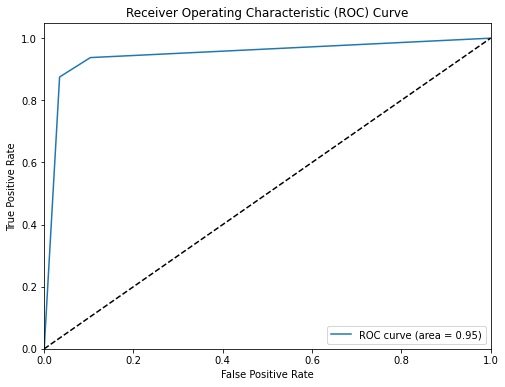

In [97]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs[:, 1], pos_label=target_labels[1])
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

In [98]:
# create logistic regression object
reg = linear_model.LogisticRegression()
   
# train the model using the training sets
reg.fit(x_train, y_train)
  
# making predictions on the testing set
y_pred = reg.predict(x_test)

In [99]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')  # 'macro' for multi-class classification
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' for multi-class classification
print("Recall:", recall)

Accuracy: 0.9555555555555556
Precision: 0.9607843137254902
Recall: 0.9583333333333334


In [100]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)  
matrix = pd.DataFrame(confusion_matrix) 
matrix

,0,1,2
0,14,0,0
1,0,14,2
2,0,0,15


In [101]:
y_probs = reg.predict_proba(x_test)  # Predict class probabilities
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr')  # 'ovr' for multi-class classification
print("ROC AUC:", roc_auc)

ROC AUC: 0.9912452107279695


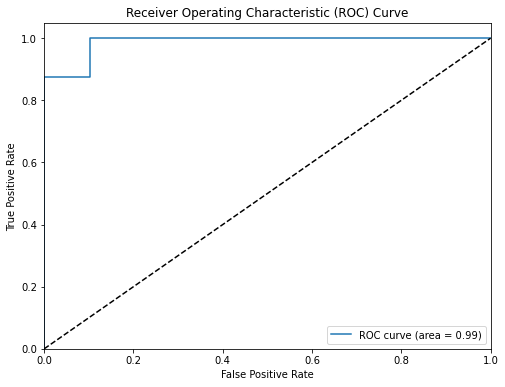

In [102]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs[:, 1], pos_label=target_labels[1])
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Naive Bayes

In [103]:
# training the model on training set

gnb = GaussianNB()
gnb.fit(x_train, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(x_test)

In [104]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')  # 'macro' for multi-class classification
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' for multi-class classification
print("Recall:", recall)

Accuracy: 0.9555555555555556
Precision: 0.9569444444444445
Recall: 0.9569444444444445


In [105]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)  
matrix = pd.DataFrame(confusion_matrix) 
matrix

,0,1,2
0,14,0,0
1,0,15,1
2,0,1,14


In [106]:
y_probs = reg.predict_proba(x_test)  # Predict class probabilities
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr')  # 'ovr' for multi-class classification
print("ROC AUC:", roc_auc)

ROC AUC: 0.9912452107279695


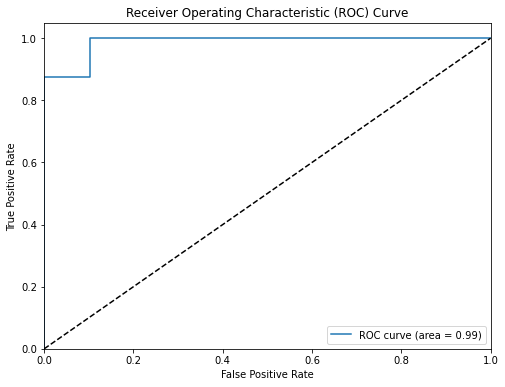

In [107]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs[:, 1], pos_label=target_labels[1])
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()